In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
predicted = pd.read_csv("../forecasts/fc_dynamic_1.csv", index_col=0)

In [33]:
actual = pd.read_pickle("../data/fulling_connected_feature_eng_test_data.pkl")

In [34]:
date_range = pd.Series(pd.date_range(start="2016-04-25", end="2016-06-19", freq='D')).dt.strftime('%Y-%m-%d').to_list()
date_range.insert(0, "id")
predicted.columns = date_range[:len(predicted.columns)]
predicted[['item_id', "Loc1", "Loc2", "Type"]] = predicted.id.str.rsplit("_", n=3, expand=True)
predicted = predicted.drop("id", axis=1)
predicted = predicted.melt(id_vars=['item_id', "Loc1", "Loc2", "Type"], var_name="date", value_name="sales_amount")
predicted = predicted.drop([ "Loc1", "Loc2", "Type"], axis=1)
predicted["date"] = pd.to_datetime(predicted["date"])
predicted = predicted.rename(columns={"sales_amount": "predicted_sales"})

In [35]:
actual = actual[["item_id", "date", "sales_amount"]]

In [37]:
combined = actual.merge(predicted, on=["item_id", "date"])

In [40]:
combined = pd.melt(combined, id_vars=['date'], value_vars=['predicted_sales', 'sales_amount'])

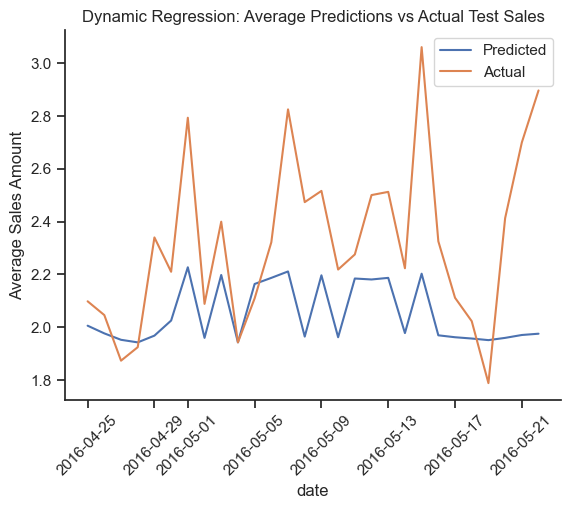

In [44]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

sns.lineplot(x='date', y='value', hue='variable', data=combined, errorbar=None).set_title("Dynamic Regression: Average Predictions vs Actual Test Sales")
plt.legend(title='', labels=['Predicted', 'Actual'])
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=45)
plt.show()

In [41]:
combined

,date,variable,value
0,2016-04-25,predicted_sales,1
1,2016-04-26,predicted_sales,1
2,2016-04-27,predicted_sales,1
3,2016-04-28,predicted_sales,1
4,2016-04-29,predicted_sales,1
...,...,...,...
46083,2016-05-18,sales_amount,1
46084,2016-05-19,sales_amount,0
46085,2016-05-20,sales_amount,4
46086,2016-05-21,sales_amount,1
